## Handling Outlier using IQR method

In [1]:
# Step 1: import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
# Step 2: Read the data set and create DataFrame

data=pd.read_csv(r"D:\New\heights.csv")
df=pd.DataFrame(data)
df

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


<Axes: ylabel='height'>

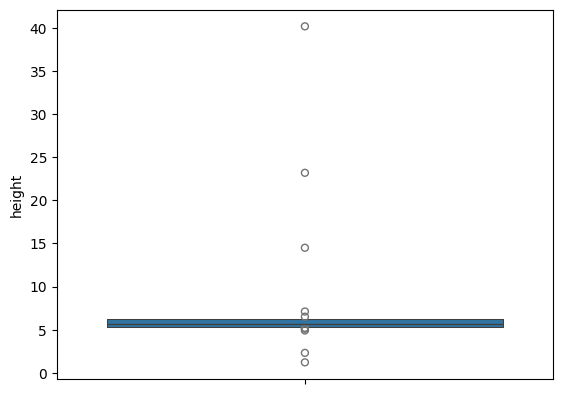

In [ ]:
# Step 3: Creating a boxplot to visualize outliers in height column
sns.boxenplot(df['height'])

In [ ]:
#Step 4: To check the statistical summary of the "height" column
df['height'].describe()

count    20.000000
mean      8.390000
std       8.782812
min       1.200000
25%       5.350000
50%       5.700000
75%       6.275000
max      40.200000
Name: height, dtype: float64

## min()       25%(Q1)        50%(Q2)           75%(Q3)          MAX()

## IQR= Q3 - Q1 == 6.27 - 5.35 = 0.925

## Calculate Upeer limit and lower limit

## upper_limit= Q3 + 1.5 * IQR  = 7.66            

## lower_limit= Q1 - 1.5 * IQR = 3.96

In [ ]:
# Step 5: calculate Q1 AND Q2 using quantile function of height column

Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)

(Q1,Q3)

(5.3500000000000005, 6.275)

In [ ]:
# Step 6: calculate IQR VALUE

IQR = Q3 - Q1

IQR

0.9249999999999998

In [ ]:
# Step 7: CALCULATE UPPER LIMIT AND LOWER LIMIT

lower_limit = Q1 - IQR * 1.5
upper_limit = Q3 + IQR * 1.5

(lower_limit,upper_limit)

(3.962500000000001, 7.6625)

In [ ]:
# Step 8:see and create new dataframe of oitlier outlier_df
outlier_df=df[(df['height'] > upper_limit) | (df['height'] < lower_limit)]
outlier_df

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [ ]:
# Step 9:remove outlier in your orijnal dataframe and create new dataframe df_no_outlier

df_no_outlier = df[(df['height'] > lower_limit) & (df['height'] < upper_limit)]

df_no_outlier

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


<Axes: ylabel='height'>

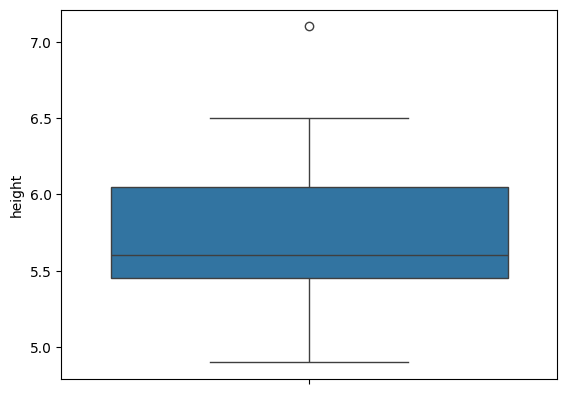

In [ ]:
# Step 10: visualize boxplot after removing outlier

sns.boxplot(df_no_outlier['height'])